#### This code is to simulate the Bayesian Linear Regression using sigmoid Basis functions with additive and multiplicative Noise

### Additive Noise

In [ ]:
#!/usr/bin/python
import os, math, sys, random
import numpy as np
import numpy.linalg as la
import scipy.stats as st
import scipy.optimize as sopt
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid
from scipy.stats import multivariate_normal

In [ ]:
## Prior 

# mu_w = np.array([1,1])

sigma_w = np.array([[1e15,0],[0,1e15]])

#### Noise 

mu_r = 0

sigma_r = 0.2


In [ ]:

#### X -Design matrix 

nparam = 2
nbasis = 2
X = np.zeros([nparam,nbasis ]) 

T1 = 20
t1 = 10
t2 = 25


X[0, 0 ] = 1
X[0, 1 ] = 1
X[1, 0 ] = 1/(1 + np.exp(T1-t1))
X[1, 1 ] = 1/(1 + np.exp(T1-t2))


####### W - parameters

w = np.zeros([nparam,1])

a0 = 0.35
a1 = 0.25
w[0] = a0
w[1] = a1

#### Data 
ndata = 2

xi = np.random.normal(0,1,(2,1))


print(xi)

Y = X.T @ w + sigma_r * xi

print("data points are", Y)


t= np.linspace(1,35, 35)
beta_model = a0 + a1/(1 + np.exp((T1-t)))

plt.figure(1,figsize=(6,4))
plt.plot(t, beta_model,label='a1')
plt.scatter([t1,t2], [Y[0,0], Y[1,0]])
plt.legend()
plt.savefig('./data_additive.pdf')
plt.close()

### Generate the analytical expression for posterior p(w/X,y)

In [ ]:
mu_w_d = np.linalg.inv( X @ X.T + sigma_r**2 * np.linalg.inv(sigma_w) ) @ X @ Y



sigma_w_d = np.linalg.inv( (1/sigma_r**2) * X @ X.T + np.linalg.inv(sigma_w))



# Create a grid of points
x2, y2 = np.linspace(0,1, 100), np.linspace(0.0, 1, 100)
X2, Y2 = np.meshgrid(x2, y2)
pos = np.dstack((X2, Y2))  # Shape (100, 100, 2)

# Evaluate the PDF at each point
rv = multivariate_normal(np.squeeze(mu_w_d), sigma_w_d)
Z = rv.pdf(pos)  # Shape (100, 100)

# Plot the PDF as a contour plot
plt.figure(figsize=(8, 6))
plt.contourf(X2, Y2, Z, levels=30, cmap="viridis")
plt.scatter(a0,a1)
plt.colorbar(label="Probability Density")
plt.title("Posterior")
plt.xlabel("a0")
plt.ylabel("a1")
plt.savefig('./analytical_posterior_additive.pdf')
plt.close()


### Joint Analytical PDF - computed using the product of two likelihoods

In [ ]:

print("data points are", Y[0,0], Y[1,0])


x2, y2 = np.linspace(0,1, 100), np.linspace(0, 1, 100)


f_t1 = (1 + np.exp(T1-t1))
f_t2 = (1 + np.exp(T1-t2))

L_a0a1 = np.zeros([len(x2), len(y2)])


for p0 in range(len(x2)):
        
    for p1 in range(len(y2)):


        #### Worked Code 

        multiplier = (1/np.sqrt((2*np.pi)*sigma_r**2))

        ### Worked code
        # err1 = np.exp(-1 * (x2[p0] - (Y[0,0] + y2[p1]/(1 + np.exp(T1-t1))))**2 / (2 * sigma_r**2)) 

        #test
        err1 = np.exp(-1 * (Y[0,0] * f_t1 - x2[p0] * f_t1  - y2[p1])**2 / (2 * sigma_r**2 * f_t1**2)) 



        ### Worked code
        # err2 = np.exp(-1 * (y2[p1] - ( (1 + np.exp(T1-t2)) * (Y[1,0] - x2[p0]) ) )**2 / (2 * sigma_r**2))

        #test
        err2 = np.exp(-1 * (Y[1,0] * f_t2 - x2[p0] * f_t2 - y2[p1])**2 / (2 * sigma_r**2 * f_t2**2))


        Lsum = multiplier * err1.item() * multiplier * err2.item()

        L_a0a1[p0,p1] = Lsum



fig = plt.figure(200,figsize=(8,6))
ax = fig.gca()
P, Q = np.meshgrid(x2,y2)
Lt = np.transpose(L_a0a1)
plt.contourf(P, Q, Lt, levels=30, cmap="viridis")
# plt.pcolormesh(P,Q,Lt,vmin=40)
plt.xlabel('$a_{0}$')
plt.ylabel('$a_{1}$')
plt.colorbar()
plt.contourf(X2, Y2, Z, levels=30, alpha=0.3, cmap="Reds")
plt.savefig('./product_of_likelihood_additive.pdf')
plt.close()


#### Multiplicative noise
##### In this case, the likelihood changes. However, the change is only in the variance which is the product of sigma and function beta(t)

In [1]:
#!/usr/bin/python
%reset -f
import os, math, sys, random
import numpy as np
import numpy.linalg as la
import scipy.stats as st
import scipy.optimize as sopt
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid
from scipy.stats import multivariate_normal

data points are 18.4889322131143 -6.126137879953887


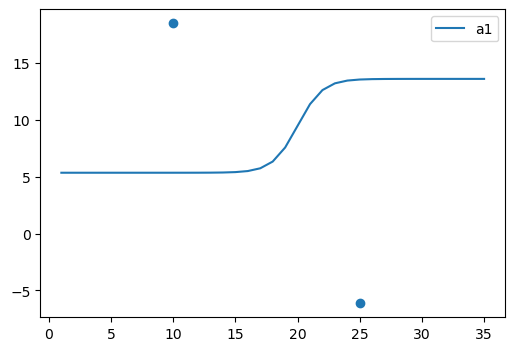

In [18]:


#### Noise 

mu_r = 0

sigma_r = 4

### Parameters

a0 = 5.35
a1 = 8.25

T1 = 20
t1 = 10
t2 = 25


xi1 = np.random.normal(0,sigma_r,1)

xi2 = np.random.normal(0,sigma_r,1)

Y1 = ((a0 + a1/(1 + np.exp(T1-t1)) ) * (1 + xi1 )).item() 


Y2 = ((a0 + a1/(1 + np.exp(T1-t2)) ) * (1 + xi2 )).item()



print("data points are", Y1, Y2)


t= np.linspace(1,35, 35)
beta_model = a0 + a1/(1 + np.exp((T1-t)))
plt.figure(11,figsize=(6,4))
plt.plot(t, beta_model,label='a1')
plt.scatter([t1,t2], [Y1, Y2])
plt.legend()
plt.savefig('./data_multiplicative.pdf')
plt.close()


In [35]:


x2, y2 = np.linspace(-1,40, 100), np.linspace(-20, 40, 100)


f_t1 = (1 + np.exp(T1-t1))
f_t2 = (1 + np.exp(T1-t2))

L_a0a1 = np.zeros([len(x2), len(y2)])


for p0 in range(len(x2)):
        
    for p1 in range(len(y2)):


        #### Worked Code 

        var1 = (sigma_r * (x2[p0] + y2[p1]/ f_t1 ) )**2

        var2 = (sigma_r * (x2[p0] + y2[p1]/ f_t2 ) )**2

        multiplier1 = (1/np.sqrt(2*np.pi*var1))

        multiplier2 = (1/np.sqrt(2*np.pi*var2))

        err1 = np.exp(-1 * (Y1 * f_t1 - x2[p0] * f_t1  - y2[p1])**2 / (2 * var1 * f_t1**2)) 

        err2 = np.exp(-1 * (Y2 * f_t2 - x2[p0] * f_t2 - y2[p1])**2 / (2 * var2 * f_t2**2))


        Lsum = multiplier1 * err1.item() * multiplier2 * err2.item()

        L_a0a1[p0,p1] = Lsum


fig = plt.figure(200,figsize=(8,6))
P, Q = np.meshgrid(x2,y2)
Lt = np.transpose(L_a0a1)
plt.contourf(P, Q, Lt, levels=30, cmap="viridis")
plt.xlabel('$a_{0}$')
plt.ylabel('$a_{1}$')
plt.colorbar()
plt.savefig('./product_of_likelihood_multiplicative.pdf')
plt.close()



<built-in method max of numpy.ndarray object at 0x1214a1d10>


### Code to Compute Multiplicative noise posterior using transformation of random variable

p(a1,a2) = p(xi_1, xi_2) * inv(jacobian)

In [39]:

# x2, y2 = np.linspace(0,1, 100), np.linspace(-0.8, 0.5, 100)


f_t1 = (1 + np.exp(T1-t1))
f_t2 = (1 + np.exp(T1-t2))


TR_jac = np.zeros([len(x2), len(y2)])


for q0 in range(len(x2)):
        
    for q1 in range(len(y2)):


        #### Worked Code 

        var1 = (x2[q0] + y2[q1]/ f_t1 )**2

        var2 = (x2[q0] + y2[q1]/ f_t2 )**2


        jac_inv = np.array([[- Y1/(var1), - Y1 * (1/f_t1)/(var1)], [- Y2/(var2), - Y2 * (1/f_t2)/(var2)]])

        multiplier11 = (1/np.sqrt(2*np.pi*sigma_r**2))

        multiplier12 = (1/np.sqrt(2*np.pi*sigma_r**2))

        err11 = np.exp(-1 * (Y1/(np.sqrt(var1)) - 1)**2 / (2 * sigma_r**2)) 

        err12 = np.exp(-1 * (Y2/(np.sqrt(var2)) - 1)**2 / (2 * sigma_r**2)) 


        Lsum2 = multiplier11 * err11.item() * multiplier12 * err12.item() * np.linalg.det(jac_inv)

        TR_jac[q0,q1] = Lsum2




fig = plt.figure(201,figsize=(8,6))
P1, Q1 = np.meshgrid(x2,y2)
Jac_TR = np.transpose(TR_jac)
plt.contourf(P1, Q1, Jac_TR, levels=30, cmap="viridis")
# plt.contourf(P, Q, Lt, levels=30, cmap="Reds", alpha=0.2)
plt.xlabel('$a_{0}$')
plt.ylabel('$a_{1}$')
plt.colorbar()
plt.savefig('./transformation_RV_multiplicative.pdf')
plt.close()

### Monte Carlo Sampling for Multiplicative noise

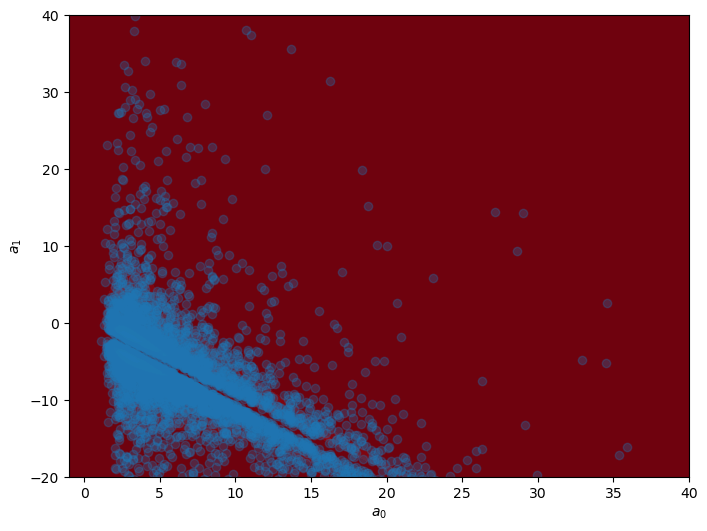

In [34]:


nsamples = 10000

Y = np.array([Y1, Y2])

f_t1 = (1 + np.exp(T1-t1))
f_t2 = (1 + np.exp(T1-t2))

A = np.zeros((2,nsamples))

for n in range(nsamples):

    xi11 = np.random.normal(0,sigma_r,1).item()
    xi22 = np.random.normal(0,sigma_r,1).item()

    X = np.array([ [1+xi11,  (1/f_t1)* (1+xi11)], [(1+xi22),  (1/f_t2)* (1+xi22)] ])

    A[:,n] = np.linalg.inv(X) @ Y



fig = plt.figure(40,figsize=(8,6))
ax = fig.gca()
plt.contourf(P1, Q1, Jac_TR, levels=30, cmap="Reds")
# plt.contourf(P, Q, Lt, levels=30, cmap="Reds")
plt.scatter(A[0,:], A[1,:], alpha=0.3)
plt.xlim([np.min(x2), np.max(x2)])
plt.ylim([np.min(y2), np.max(y2)])
plt.xlabel('$a_{0}$')
plt.ylabel('$a_{1}$')
plt.savefig('./MonteCarlo_multiplicative.pdf')
plt.close()